In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
import random
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact


In [2]:
# Import dataset from CSV files.

In [3]:
anime_ratings = pd.read_csv("anime_ratings_merged.csv")
anime_data = pd.read_csv('anime_cleaned.csv')

/var/folders/g5/pw1msc9d60x2ykjs16vc13100000gp/T/ipykernel_488/3403287984.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  anime_ratings = pd.read_csv("anime_ratings_merged.csv")


In [4]:
anime_ratings

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Episodes,Ranked,Popularity,user_id,rating
0,0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,26,28.0,39,19,8
1,1,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,26,28.0,39,53,10
2,2,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,26,28.0,39,73,9
3,3,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,26,28.0,39,112,10
4,4,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,26,28.0,39,147,8
...,...,...,...,...,...,...,...,...,...,...,...
10834979,10834979,48456,SK∞: Crazy Rock Jam,6.52,"Comedy, Sports",SK∞: Crazy Rock Jam,1,5799.0,4830,131875,6
10834980,10834980,48456,SK∞: Crazy Rock Jam,6.52,"Comedy, Sports",SK∞: Crazy Rock Jam,1,5799.0,4830,147566,7
10834981,10834981,48456,SK∞: Crazy Rock Jam,6.52,"Comedy, Sports",SK∞: Crazy Rock Jam,1,5799.0,4830,152953,5
10834982,10834982,48456,SK∞: Crazy Rock Jam,6.52,"Comedy, Sports",SK∞: Crazy Rock Jam,1,5799.0,4830,158503,6


<function matplotlib.pyplot.show(close=None, block=None)>

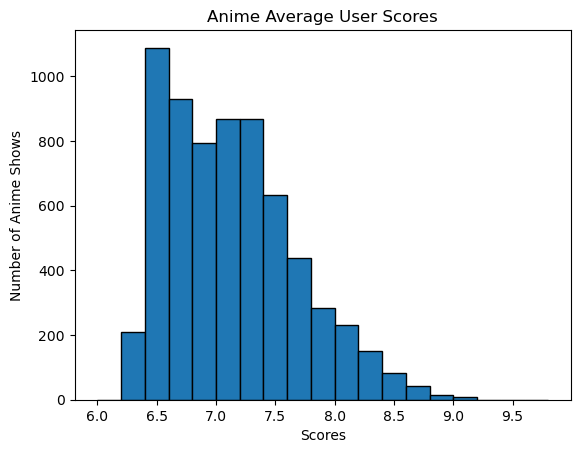

In [5]:
plt.hist(anime_data['Score'], bins=np.arange(6, 10, 0.2), edgecolor='black')
plt.title('Anime Average User Scores')
plt.xlabel('Scores')
plt.ylabel('Number of Anime Shows')
plt.show

In [6]:
# create a new dataframe containing the top 250 anime by popularity
top_250 = anime_data.sort_values(by='Popularity').head(250)
top_250

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Episodes,Ranked,Popularity
1101,1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,37,60.0,1
3908,7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,25,115.0,2
2446,3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,64,1.0,3
3527,6614,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,25,2584.0,4
4708,10451,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,12,81.0,5
...,...,...,...,...,...,...,...,...,...
6250,15710,39617,Yakusoku no Neverland 2nd Season,7.49,"Sci-Fi, Mystery, Psychological, Thriller, Shounen",The Promised Neverland Season 2,11,1621.0,248
5083,11583,32867,Bungou Stray Dogs 2nd Season,8.20,"Action, Mystery, Seinen, Super Power, Supernat...",Bungo Stray Dogs 2,12,312.0,248
602,718,790,Ergo Proxy,7.92,"Psychological, Mystery, Sci-Fi",Ergo Proxy,23,651.0,249
5441,12685,34902,Tsurezure Children,7.67,"Comedy, Romance, School, Shounen",Tsuredure Children,12,1102.0,249


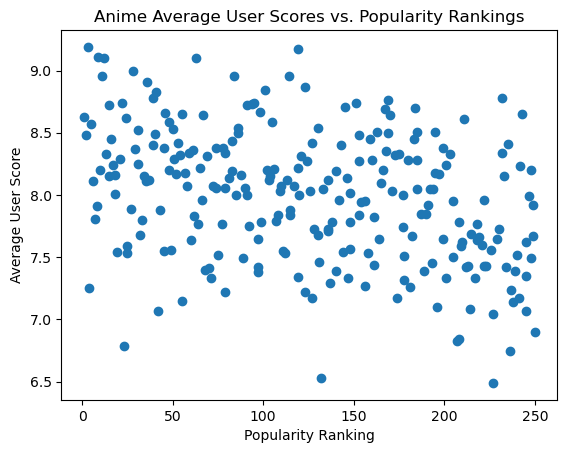

In [7]:
# create a scatter plot of the top 250 anime
plt.scatter(top_250['Popularity'],top_250['Score'])
plt.title('Anime Average User Scores vs. Popularity Rankings')
plt.xlabel('Popularity Ranking')
plt.ylabel('Average User Score')
plt.show()

In [9]:
# Takes the top 1000 most popular shows and imports user scores into a pivot table
top_rating = anime_ratings.sort_values(by='Popularity')
top_rating = top_rating[top_rating['Popularity'] < 1001]
anime_pt = top_rating.pivot_table(index = 'English name', columns = 'user_id',values = 'rating').fillna(0)
anime_pt.head()

user_id,17,19,42,53,73,111,112,121,145,146,...,176589,176610,176620,176626,176637,176638,176654,176683,176686,176690
English name,,,,,,,,,,,,,,,,,,,,,
.hack//Sign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,0.0
07-Ghost,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,8.0,8.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,8.0
5 Centimeters Per Second,6.0,8.0,6.0,6.0,8.0,7.0,0.0,10.0,9.0,8.0,...,0.0,10.0,0.0,10.0,6.0,0.0,0.0,10.0,0.0,0.0
91 Days,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0,...,10.0,0.0,9.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
A Certain Magical Index,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,8.0,0.0,...,8.0,8.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0


In [31]:
top_rating

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Episodes,Ranked,Popularity,user_id,rating
1751290,1751290,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,37,60.0,1,109997,9
1747090,1747090,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,37,60.0,1,58516,7
1747089,1747089,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,37,60.0,1,58508,10
1747088,1747088,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,37,60.0,1,58496,6
1747087,1747087,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,37,60.0,1,58494,7
...,...,...,...,...,...,...,...,...,...,...,...
4719827,4719827,10460,Kimi to Boku.,7.70,"Comedy, Drama, Romance, School, Shounen, Slice...",You and Me.,13,1010.0,1000,66548,8
4719826,4719826,10460,Kimi to Boku.,7.70,"Comedy, Drama, Romance, School, Shounen, Slice...",You and Me.,13,1010.0,1000,66511,5
4719825,4719825,10460,Kimi to Boku.,7.70,"Comedy, Drama, Romance, School, Shounen, Slice...",You and Me.,13,1010.0,1000,66118,7
4719835,4719835,10460,Kimi to Boku.,7.70,"Comedy, Drama, Romance, School, Shounen, Slice...",You and Me.,13,1010.0,1000,67063,9


<function matplotlib.pyplot.show(close=None, block=None)>

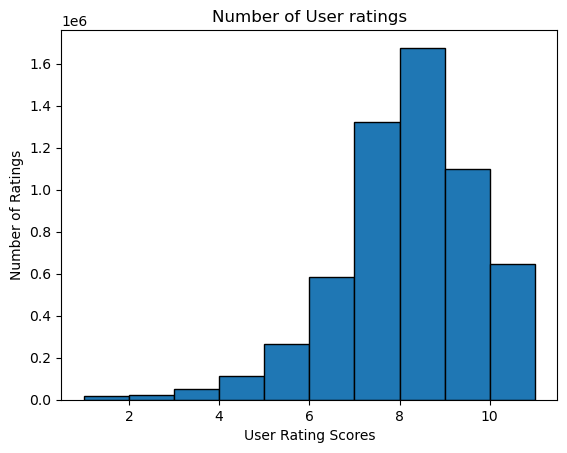

In [36]:
# create a histogram of user scores
ratings = top_rating['rating']
plt.hist(ratings, bins=10, range = (1,11), edgecolor='black')
plt.title('Number of User ratings')
plt.xlabel('User Rating Scores')
plt.ylabel('Number of Ratings')
plt.show

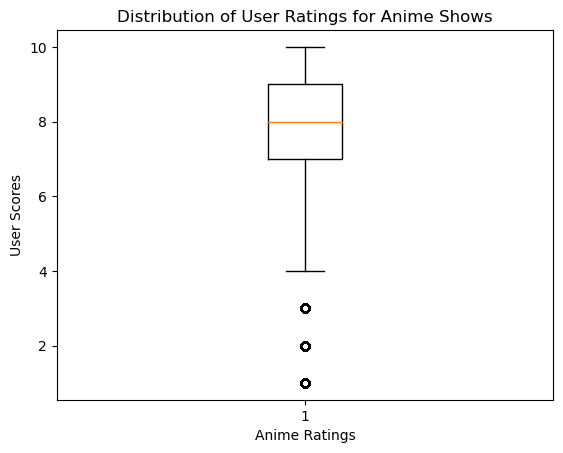

In [39]:
# create a boxplot of user scores
fig, ax = plt.subplots()
ax.boxplot(ratings)
ax.set_title('Distribution of User Ratings for Anime Shows')
ax.set_xlabel('Anime Ratings')
ax.set_ylabel('User Scores')

plt.show()

In [11]:
# Converts the pivot table to a sparse matrix
anime_matrix = csr_matrix(anime_pt.values)

In [13]:
# Fit nearest neighbors model
anime_nn = NearestNeighbors(metric='cosine', algorithm='brute')
anime_nn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [41]:
# create an empty list to store lists of indices for each user
top_anime_indices = []

# loop over each user in the test data
for i in range(anime_pt.shape[1]):
    user_ratings = anime_pt.iloc[:, i].values >= 9
    # Create an inner list including indices for top rated shows
    top_anime_inner = []
    for j, rating in enumerate(user_ratings):
        if rating:
            top_anime_inner.append(j)
    # if the user has at least 20 top rated shows then their list is added to the outer list
    # This helps with testing since we will be comparing 10 recommended shows to the user's actual list
    if len(top_anime_inner) > 20:
        top_anime_indices.append(top_anime_inner)
    


In [42]:
accuracy = []
# loop over every user in our 2d array
for user in range(len(top_anime_indices)):
    anime_index = random.choice(top_anime_indices[user])
    #print(anime_index)
    distances, indices = anime_nn.kneighbors(anime_pt.iloc[anime_index,:].values.reshape(1, -1), n_neighbors = 11)
    recommended_anime_indices = indices[0]
    
    num_correct = len(set(recommended_anime_indices).intersection(set(top_anime_indices[user])))
    accuracy.append(num_correct / 10)

# calculate the accuracy as the proportion of correct predictions
accuracy = sum(accuracy) / len(accuracy)
print(f"Accuracy: {accuracy:.2%}")
    

Accuracy: 53.51%


In [44]:
def get_recommendations(user_input):
    # take user input and run it through the model in order to generate recommendations
    #user_input = input('Please enter the name of an anime: ')
    try:
        query_index = anime_pt[anime_pt.index == user_input].iloc[0]
        #print(query_index)
        distances, indices = anime_nn.kneighbors(query_index.values.reshape(1, -1), n_neighbors = 11)
        #print(indices)
        # Output the recommended shows in a user readable format
        for i in range(0, len(distances.flatten())):
            if i == 0:
                print('Recommendations for {0}:\n'.format(user_input))
            else:
                print('{0}: {1}'.format(i, anime_pt.index[indices.flatten()[i]]))
    except Exception as e:
        print('Anime name not found.')
        #print(e)

In [45]:
def print_anime(user_input, distances, indices):
    # Output the recommended shows in a user readable format
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(user_input))
        else:
            print('{0}: {1}'.format(i, anime_pt.index[indices.flatten()[i]]))

In [1]:
# create a list of titles for the combo box
anime_titles = anime_pt.index.tolist()
# create a combo box widget
anime_select = widgets.Combobox(
    placeholder='Anime Name',
    options=anime_titles,
    description='Please select an anime: ',
    ensure_option=True,
    disabled=False
)
# provide functionality to the combo box

interact(get_recommendations, user_input=anime_select)

NameError: name 'anime_pt' is not defined